In [24]:
import pandas as pd

In [25]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv", index_col=0)

In [26]:
df.head()
df.shape

(23486, 10)

In [27]:
df = df[["Review Text", "Rating"]]
df.columns = ["Review", "Rating"]

In [44]:
df.isna().sum()

Review       0
Rating       0
Sentiment    0
dtype: int64

In [28]:
def create_sentiment(rating):
    if rating < 3:
        return -1
    elif rating > 3:
        return 1
    else:
        return 0

In [29]:
df["Sentiment"] = df["Rating"].apply(create_sentiment)

In [30]:
df.head()

,Review,Rating,Sentiment
0,Absolutely wonderful - silky and sexy and comf...,4,1
1,Love this dress! it's sooo pretty. i happene...,5,1
2,I had such high hopes for this dress and reall...,3,0
3,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,This shirt is very flattering to all due to th...,5,1


In [31]:
from sklearn.feature_extraction.text import re


def clean_data(review):
    # remove all non alphanumeric and non whitespace characters
    no_punc = re.sub(r"[^\w\s]", "", str(review))
    # remove all digits from string
    no_digits = "".join([i for i in no_punc if not i.isdigit()])
    return no_digits

In [32]:
df["Review"] = df["Review"].apply(clean_data)

In [33]:
df["Review"][3]

'I love love love this jumpsuit its fun flirty and fabulous every time i wear it i get nothing but great compliments'

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
tfidf = TfidfVectorizer(stop_words="english")

In [36]:
X = tfidf.fit_transform(df["Review"])

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
y = df["Sentiment"]  # target variable
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [39]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="saga")
lr.fit(X_train, y_train)  # fit the model
preds = lr.predict(X_test)  # make predictions

In [40]:
from sklearn.metrics import accuracy_score

accuracy_score(preds, y_test)  # 0.82

0.8245912806539509

In [41]:
def preprocess_new_data(review):
    cleaned_review = clean_data(review)
    return cleaned_review

new_reviews = [
    "This dress is amazing!",
    "I didn't like the quality of this product.",
    "I would not recommend this product to anyone.",
    "Absolutely love it!"
    "This is the best product I have ever purchased!",
    "I am extremely disappointed with this product.",
    "The quality of this product is top-notch.",
    "I regret buying this product.",
    "This product is worth every penny.",
    "I wouldn't buy this product again.",
    "I am in love with this product!",
    "This is the worst product I have ever used.",
    "I highly recommend this product to everyone.",
    "I am not satisfied with this product at all."
]

preprocessed_reviews = [preprocess_new_data(review) for review in new_reviews]
X_new = tfidf.transform(preprocessed_reviews)
new_preds = lr.predict(X_new)

for review, sentiment in zip(new_reviews, new_preds):
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {'Positive' if sentiment == 1 else 'Neutral' if sentiment == 0 else 'Negative'}")
    print()

Review: This dress is amazing!
Predicted Sentiment: Positive

Review: I didn't like the quality of this product.
Predicted Sentiment: Negative

Review: I would not recommend this product to anyone.
Predicted Sentiment: Positive

Review: Absolutely love it!This is the best product I have ever purchased!
Predicted Sentiment: Positive

Review: I am extremely disappointed with this product.
Predicted Sentiment: Negative

Review: The quality of this product is top-notch.
Predicted Sentiment: Negative

Review: I regret buying this product.
Predicted Sentiment: Positive

Review: This product is worth every penny.
Predicted Sentiment: Positive

Review: I wouldn't buy this product again.
Predicted Sentiment: Negative

Review: I am in love with this product!
Predicted Sentiment: Positive

Review: This is the worst product I have ever used.
Predicted Sentiment: Negative

Review: I highly recommend this product to everyone.
Predicted Sentiment: Positive

Review: I am not satisfied with this produc

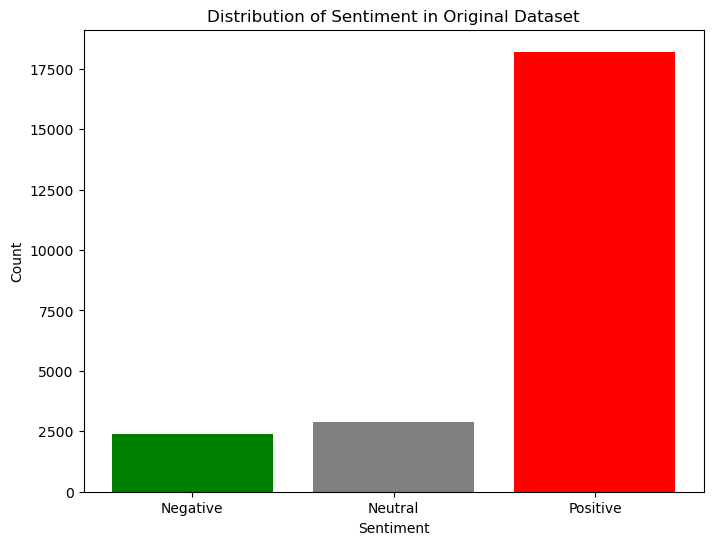

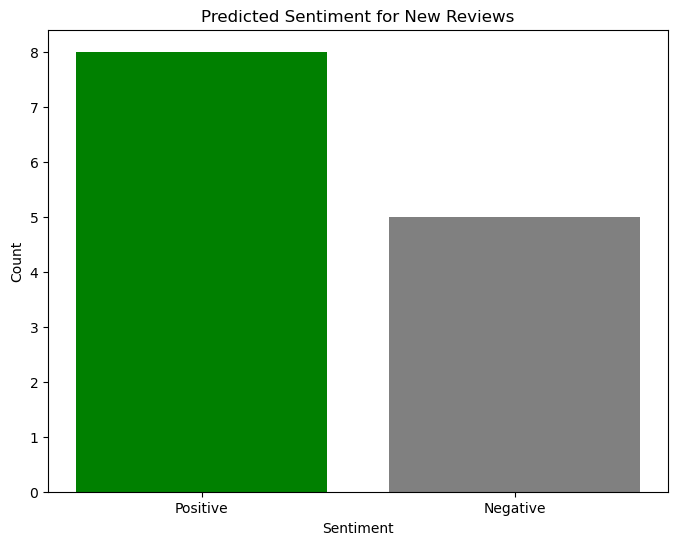

In [42]:
import matplotlib.pyplot as plt

# Distribution of sentiment in the original dataset
sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['red', 'grey', 'green'])
plt.title('Distribution of Sentiment in Original Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([-1, 0, 1], ['Negative', 'Neutral', 'Positive'])
plt.show()

# Predicted sentiment for new reviews
predicted_sentiments = ['Positive' if sentiment == 1 else 'Neutral' if sentiment == 0 else 'Negative' for sentiment in new_preds]
sentiment_counts_new = pd.Series(predicted_sentiments).value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts_new.index, sentiment_counts_new.values, color=['green', 'grey', 'red'])
plt.title('Predicted Sentiment for New Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
